In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import os
try:
    os.mkdir('./saved_plots')
except:
    pass

folder = "logs"
seed_choices = {"gold": [1, 5, 10, 25, 50, 70, 80, 90, 100, 1000], "gem": [8, 10, 705, 905, 1575, 2050, 2100]} # 1225, 
total_eps_choices = {"gold": 20000, "gem": 25000}
store = {"gold": {'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[bridge]': {'ep': [], 'r': [], 'l': []}, 'get[gold]': {'ep': [], 'r': [], 'l': []}}, "gem": {'ep': {'ep': [], 'r': [], 'l': []}, 'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[stick]': {'ep': [], 'r': [], 'l': []}, 'make[axe]': {'ep': [], 'r': [], 'l': []}, 'get[gem]': {'ep': [], 'r': [], 'l': []}}}
for top_goal in ["gold", "gem"]:
    for seed in seed_choices[top_goal]:
        new_goal = False
        file = folder+"/"+"{}_{}_finetune_no_track.log".format(top_goal, seed)
        with open(file, "r") as f:
            for i, line in enumerate(f.readlines()):
                if "Currently working on goal" in line:
                    task = line.split()[-1]
                    new_goal = True
                elif new_goal and 'At episode' in line:
                    ep = float(line.split()[3])
                    store[top_goal][task]['ep'].append(ep)

                    avg_reward = float(line.split()[-1])
                    store[top_goal][task]['r'].append(avg_reward)

                    store[top_goal][task]['l'].append('option-templates')
                    if ep == 4980:
                        new_goal=False

folder = "../sticky_mittens_bottom_up/logs"
seed_choices = {"gold": [45, 50, 1020, 1025, 1000, 1005], 
                "gem": [25, 50, 1005, 1040, 1035]
                }
total_eps_choices = {"gold": 20000, "gem": 25000}
#store = {"gold": {'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[bridge]': {'ep': [], 'r': [], 'l': []}, 'get[gold]': {'ep': [], 'r': [], 'l': []}}, "gem": {'ep': {'ep': [], 'r': [], 'l': []}, 'get[wood]': {'ep': [], 'r': [], 'l': []}, 'get[iron]': {'ep': [], 'r': [], 'l': []}, 'make[stick]': {'ep': [], 'r': [], 'l': []}, 'make[axe]': {'ep': [], 'r': [], 'l': []}, 'get[gem]': {'ep': [], 'r': [], 'l': []}}}
for top_goal in ["gold", "gem"]:
    for seed in seed_choices[top_goal]:
        new_goal = False
        file = folder+"/"+"{}_{}.log".format(top_goal, seed)
        with open(file, "r") as f:
            for i, line in enumerate(f.readlines()):
                if "Currently working on goal" in line:
                    task = line.split()[-1]
                    new_goal = True
                elif new_goal and 'At episode' in line:
                    ep = float(line.split()[3])
                    store[top_goal][task]['ep'].append(ep)

                    avg_reward = float(line.split()[-1])
                    store[top_goal][task]['r'].append(avg_reward)

                    store[top_goal][task]['l'].append('option value iteration')
                    if ep == 4980:
                        new_goal=False


In [2]:
from matplotlib import pyplot as plt 
plt.rc('font', size=24)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
plt.rc('ytick', labelsize=24)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

def plot(top_goal, task, plot_name):
    plt.figure(figsize=(9,7))
    task_pre = task.split('[')[0]
    task_post = task.split('[')[1][:-1]
    plt.title(task_pre + ' ' + task_post)
    dicti = {'episodes': store[top_goal][task]['ep'], 'avg reward': store[top_goal][task]['r'], '': store[top_goal][task]['l']}
    df = pd.DataFrame.from_dict(dicti)
    sns.lineplot(x='episodes', y='avg reward', hue='',
        data=df)
    plt.savefig(f'./saved_plots/{plot_name}')

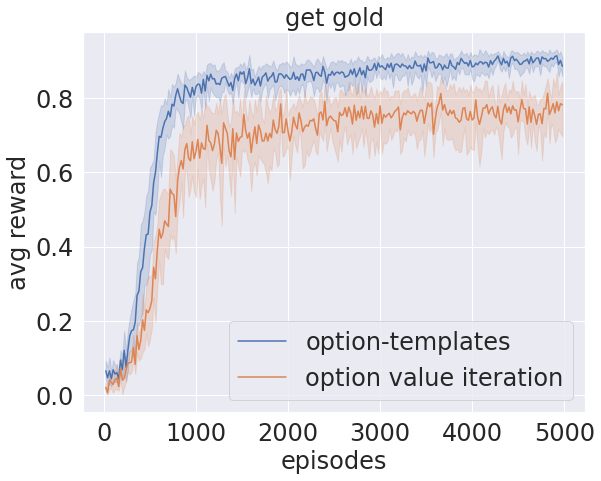

In [3]:
plot("gold", "get[gold]", "gold_1_new")

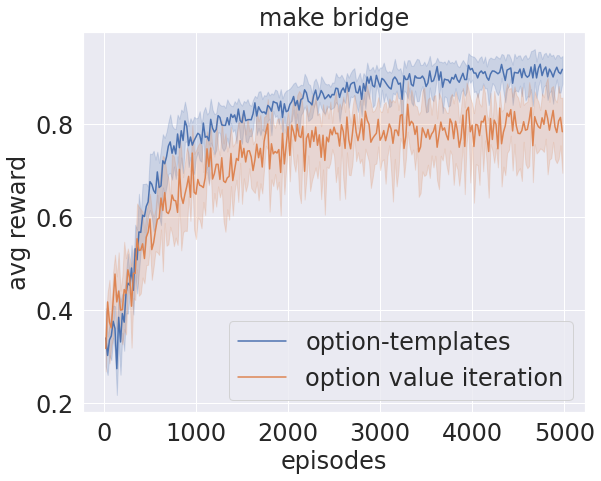

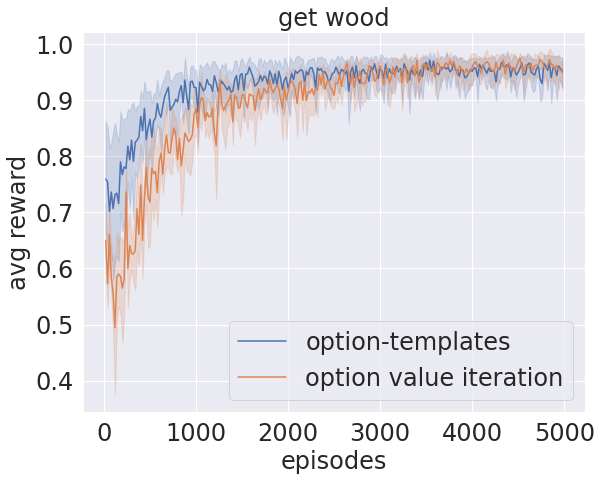

In [4]:
plot("gold", "make[bridge]", "gold_2_new")
plot("gold", "get[wood]", "gold_3_new")

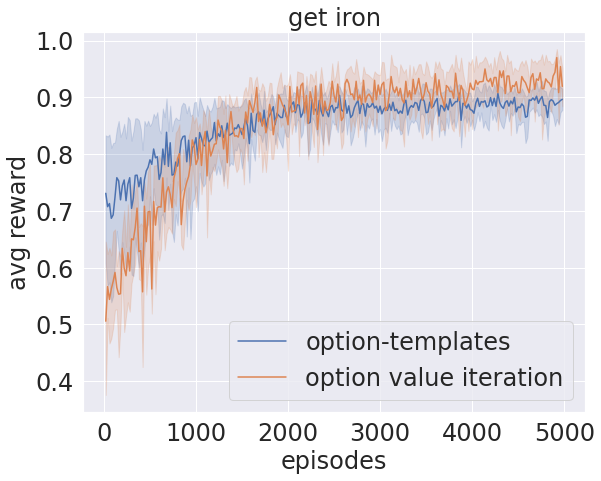

In [5]:
plot("gold", "get[iron]", "gold_4_new")

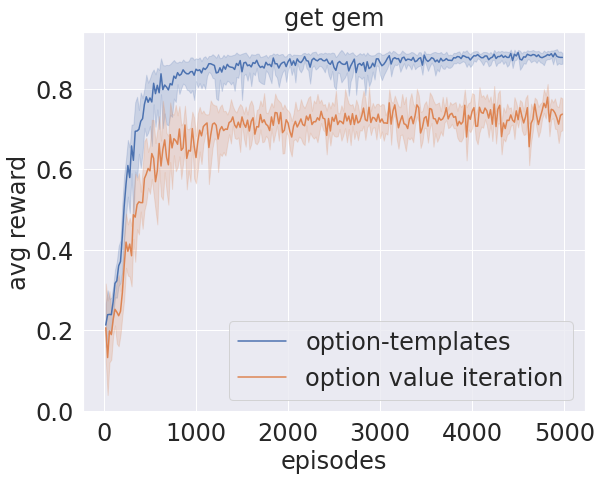

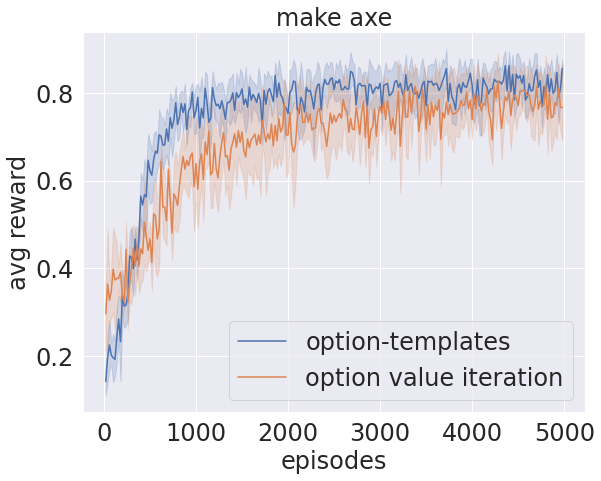

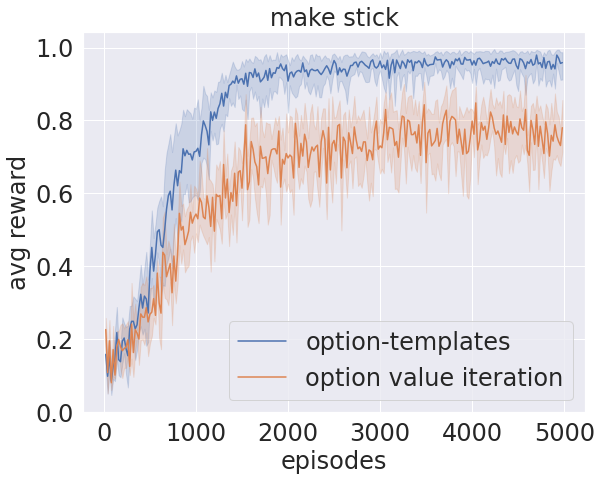

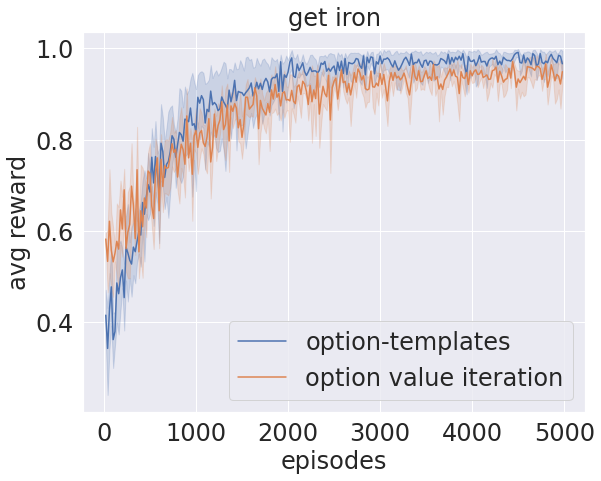

In [6]:
plot("gem", "get[gem]", "gem_1_new")
plot("gem", "make[axe]", "gem_2_new")
plot("gem", "make[stick]", "gem_3_new")
plot("gem", "get[iron]", "gem_5_new")

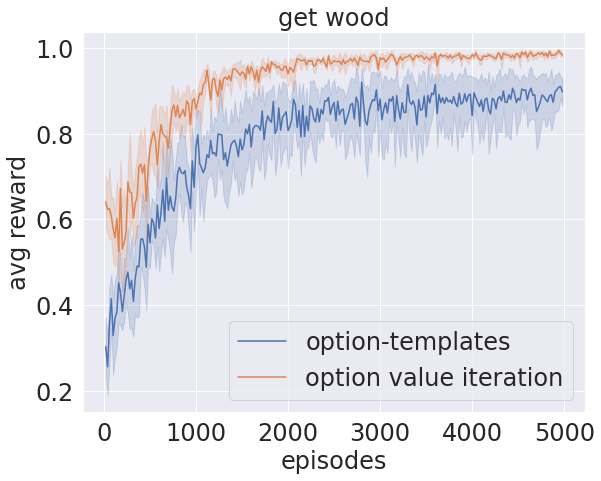

In [7]:
plot("gem", "get[wood]", "gem_4_new")